#The Evaluation Theatre notebook only runs in jupyter notebook
Let JenD know if you need it with jupyter lab.

In [8]:
!pwd

/Users/JenD/W210/CapstoneProject/bittah-ninja/eval


In [9]:
!ls

EvalTheatre.ipynb         fake.csv
MakeyFakey.ipynb          grownManPunchesPinata.mp4


In [11]:
import doctest
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
from sklearn.metrics import confusion_matrix

In [12]:
from ipywidgets import Video, Image # run ```!jupyter nbextension list``` to verify config

In [13]:
!jupyter nbextension list

Known nbextensions:
  config dir: /anaconda3/envs/cappy/etc/jupyter/nbconfig
    notebook section
      jupyter-js-widgets/extension  enabled 
      - Validating: OK
      jupyter-video/extension  enabled 
      - Validating: OK


In [14]:
model_predix = pd.read_csv('fake.csv',header=0,index_col=0)
ground_truth = pd.read_csv('../first_1K_labeled.csv',header=0,index_col=0)
# We are only predicting binary: punch or no punch at this time
ground_truth['binary']=ground_truth.apply(lambda x: int(x['class']>0),axis=1)
gt_labels = {0:'NoPunch',\
            1:'ViolentPunchContact',\
            2:'ViolentPunchWithoutContact',\
            3:'NonviolentPunchContact',\
            4:'NonviolentPunchWithoutContact'}

In [15]:
# Verify the prediction file has a column named 'predix'
def predix_col_must_be_present(x):
    """Return whether prediction file contains column named 'predix'

    >>> predix_col_must_be_present(model_predix)
    True
    """
    return 'predix' in x.columns

# Verify we're only predicting 1=punch or else 0=no_punch at this time
def should_predict_binary_only(x):
    """Return set of unique values of model predictions.

    >>> should_predict_binary_only(model_predix)
    {0, 1}
    """
    return set(x['predix'].unique())

# Verify we're not making predictions on any excluded videos
def no_excluded_videos_should_be_predicted(x):
    """Return count of videos predicted that should have been excluded
    
    >>> no_excluded_videos_should_be_predicted(model_predix)
    0
    """
    return x.index.intersection(ground_truth[ground_truth['class'] == -1].index).shape[0]

if __name__ == '__main__':
    import doctest
    doctest.testmod()

In [16]:
# Change this to 'class' when/if we want to see how our classes confuse things
labels=list(ground_truth['class'].unique())
labels.remove(-1)
labels.sort()

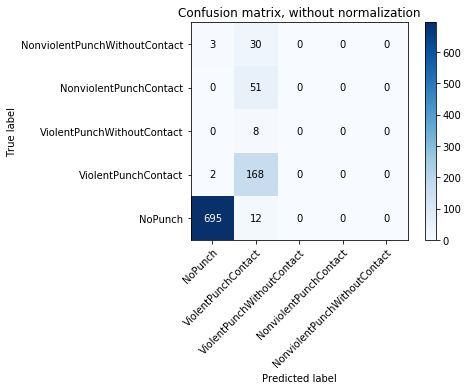

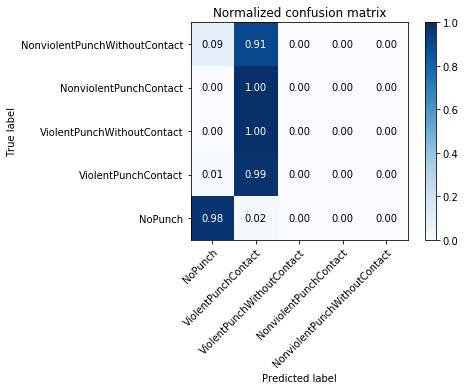

In [17]:
def plot_confusion_matrix(y_true, y_pred, labels,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=labels, yticklabels=labels,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')
    ax.set_xlim(left=-0.5, right=4.5)
    ax.set_ylim(bottom=-0.5, top=4.5)

    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    return ax


np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plot_confusion_matrix(ground_truth['class'][model_predix.index], model_predix['predix'], labels=gt_labels.values(),
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plot_confusion_matrix(ground_truth['class'][model_predix.index], model_predix['predix'], labels=gt_labels.values(), normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [29]:
samples={}
for truth in range(0,5):
    samples[truth]={}
    for pred in range(0,2):
        if bool(ground_truth[(ground_truth['class']==truth) & (model_predix['predix']==pred)].shape[0]):
            samples[truth][pred] = ground_truth[(ground_truth['class']==truth) & (model_predix['predix']==pred)].sample(1)

In [19]:
def fetch_sample(real,predicted):
    truth_target = samples.get(real,None)
    if truth_target:
        pred_target = truth_target.get(predicted,None)
        return pred_target

In [28]:
show = None
c00 = fetch_sample(0,0)
truth,inference = 'NO-PUNCH','same'
if bool(c00.shape[0]):
    clip, judge = c00.head(1)['clip_title'].iloc[0],c00.head(1)['labeler'].iloc[0]
    print(f"{truth} clip predicted as {inference} [{clip} brought to you by {judge}]".format())
    show = Video.from_file('/root/vids/' + clip)
show

NO-PUNCH clip predicted as same [NV_202.mp4 brought to you by Alex]


Video(value=b'\x00\x00\x00\x18ftypmp42\x00\x00\x00\x00isommp42\x00\x00-Amoov\x00\x00\x00lmvhd\x00\x00\x00\x00\…

In [ ]:
show = None
c01 = fetch_sample(0,1)
truth,inference = 'NO-PUNCH','PUNCH'
if bool(c01.shape[0]):
    clip, judge = c01.head(1)['clip_title'].iloc[0],c01.head(1)['labeler'].iloc[0]
    print(f"{truth} clip predicted as {inference} [{clip} brought to you by {judge}]".format())
    show = Video.from_file('/root/vids/' + clip)
show

In [ ]:
show = None
c10 = fetch_sample(1,0)
truth,inference = 'VIOLENT-PUNCH-CONTACT','no-PUNCH'
if bool(c10.shape[0]):
    clip, judge = c10.head(1)['clip_title'].iloc[0],c10.head(1)['labeler'].iloc[0]
    print(f"{truth} clip predicted as {inference} [{clip} brought to you by {judge}]".format())
    show = Video.from_file('/root/vids/' + clip)
show

In [ ]:
show = None
c11 = fetch_sample(1,1)
truth,inference = 'VIOLENT-PUNCH-CONTACT','PUNCH'
if bool(c11.shape[0]):
    clip, judge = c11.head(1)['clip_title'].iloc[0],c11.head(1)['labeler'].iloc[0]
    print(f"{truth} clip predicted as {inference} [{clip} brought to you by {judge}]".format())
    show = Video.from_file('/root/vids/' + clip)
show

In [ ]:
show = None
c20 = fetch_sample(2,0)
truth,inference = 'VIOLENT-PUNCH-without-contact','no-PUNCH'
if bool(c20.shape[0]):
    clip, judge = c20.head(1)['clip_title'].iloc[0],c20.head(1)['labeler'].iloc[0]
    print(f"{truth} clip predicted as {inference} [{clip} brought to you by {judge}]".format())
    show = Video.from_file('/root/vids/' + clip)
show

In [ ]:
show = None
c21 = fetch_sample(2,1)
truth,inference = 'VIOLENT-PUNCH-without-contact','PUNCH'
if bool(c21.shape[0]):
    clip, judge = c21.head(1)['clip_title'].iloc[0],c21.head(1)['labeler'].iloc[0]
    print(f"{truth} clip predicted as {inference} [{clip} brought to you by {judge}]".format())
    show = Video.from_file('/root/vids/' + clip)
show

In [ ]:
show = None
c30 = fetch_sample(3,0)
truth,inference = 'nonviolent-PUNCH-CONTACT','no-PUNCH'
if bool(c30.shape[0]):
    clip, judge = c30.head(1)['clip_title'].iloc[0],c30.head(1)['labeler'].iloc[0]
    print(f"{truth} clip predicted as {inference} [{clip} brought to you by {judge}]".format())
    show = Video.from_file('/root/vids/' + clip)
show

In [ ]:
show = None
c31 = fetch_sample(3,1)
truth,inference = 'nonviolent-PUNCH-CONTACT','PUNCH'
if bool(c31.shape[0]):
    clip, judge = c31.head(1)['clip_title'].iloc[0],c31.head(1)['labeler'].iloc[0]
    print(f"{truth} clip predicted as {inference} [{clip} brought to you by {judge}]".format())
    show = Video.from_file('/root/vids/' + clip)
show

In [ ]:
show = None
c40 = fetch_sample(4,0)
truth,inference = 'nonviolent-PUNCH-without-contact','no-PUNCH'
if bool(c40.shape[0]):
    clip, judge = c30.head(1)['clip_title'].iloc[0],c30.head(1)['labeler'].iloc[0]
    print(f"{truth} clip predicted as {inference} [{clip} brought to you by {judge}]".format())
    show = Video.from_file('/root/vids/' + clip)
show

In [ ]:
show = None
c41 = fetch_sample(4,1)
truth,inference = 'nonviolent-PUNCH-without-contact','PUNCH'
if bool(c41.shape[0]):
    clip, judge = c41.head(1)['clip_title'].iloc[0],c41.head(1)['labeler'].iloc[0]
    print(f"{truth} clip predicted as {inference} [{clip} brought to you by {judge}]".format())
    show = Video.from_file('/root/vids/' + clip)
show